# 1. Загрузка датасета и его обработка

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('cars.csv', encoding = 'cp1251', sep = ',')
df.drop(columns={'dateCrawled','lastSeen;;;;;;;;', 'nrOfPictures', 'postalCode', 'name'}, inplace = True)
df.drop_duplicates(inplace= True)
df.dropna(how = 'all', inplace = True)
df = df[df['price'] != 'test']
df = df[df['price'] != 'control']
df

/Users/grigory/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,7,9,12,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated
0,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24 00:00:00
1,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,2016-03-24 00:00:00
3,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17 00:00:00
4,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,2016-03-31 00:00:00
5,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000.0,10,benzin,bmw,ja,2016-04-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000.0,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00
371820,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000.0,3,benzin,smart,nein,2016-03-05 00:00:00
371821,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000.0,3,diesel,volkswagen,nein,2016-03-19 00:00:00
371822,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000.0,6,diesel,volkswagen,NaN,2016-03-20 00:00:00


# 2.	Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365503 entries, 0 to 371823
Data columns (total 15 columns):
seller                 365503 non-null object
offerType              365503 non-null object
price                  365503 non-null object
abtest                 365503 non-null object
vehicleType            327953 non-null object
yearOfRegistration     365503 non-null object
gearbox                345612 non-null object
powerPS                365503 non-null object
model                  345181 non-null object
kilometer              365503 non-null float64
monthOfRegistration    365503 non-null object
fuelType               332376 non-null object
brand                  365503 non-null object
notRepairedDamage      294194 non-null object
dateCreated            365503 non-null object
dtypes: float64(1), object(14)
memory usage: 44.6+ MB


In [3]:
df.dtypes

seller                  object
offerType               object
price                   object
abtest                  object
vehicleType             object
yearOfRegistration      object
gearbox                 object
powerPS                 object
model                   object
kilometer              float64
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
dtype: object

In [4]:
df.shape

(365503, 15)

In [5]:
df.isnull().sum()

seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37550
yearOfRegistration         0
gearbox                19891
powerPS                    0
model                  20322
kilometer                  0
monthOfRegistration        0
fuelType               33127
brand                      0
notRepairedDamage      71309
dateCreated                0
dtype: int64

In [6]:
df.nunique()

seller                    2
offerType                 2
price                  8339
abtest                    2
vehicleType               8
yearOfRegistration      260
gearbox                   2
powerPS                1271
model                   251
kilometer                13
monthOfRegistration      26
fuelType                  7
brand                    40
notRepairedDamage         2
dateCreated             113
dtype: int64

# 3.	Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [48]:
df['price'] = df['price'].astype('int64')
df['powerPS'] = df['powerPS'].astype('int64')
df['yearOfRegistration'] = df['yearOfRegistration'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365503 entries, 0 to 371823
Data columns (total 15 columns):
seller                 365503 non-null object
offerType              365503 non-null object
price                  365503 non-null int64
abtest                 365503 non-null object
vehicleType            327953 non-null object
yearOfRegistration     365503 non-null int64
gearbox                345612 non-null object
powerPS                365503 non-null int64
model                  345181 non-null object
kilometer              365503 non-null float64
monthOfRegistration    365503 non-null object
fuelType               332376 non-null object
brand                  365503 non-null object
notRepairedDamage      294194 non-null object
dateCreated            365503 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 44.6+ MB


# 4.	Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1db177fd0>]],
      dtype=object)

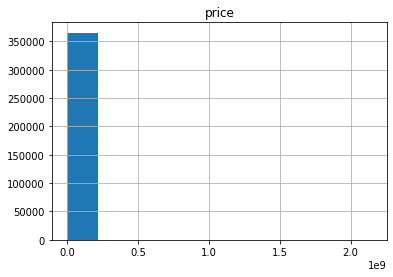

In [9]:
df.hist(column = 'price')

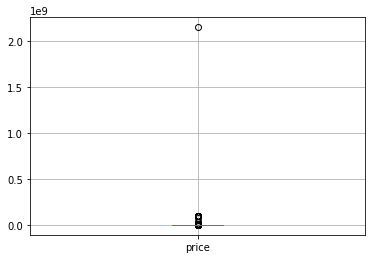

In [10]:
df.boxplot(column = 'price')

In [11]:
df = df[df['price'] < df['price'].quantile(0.75)]
df = df[df['price'] > df['price'].quantile(0.25)]

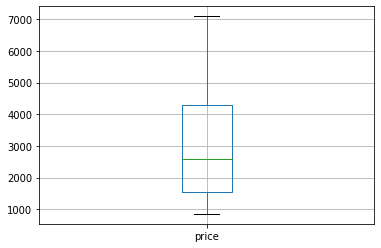

In [12]:
df.boxplot(column = 'price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1da423ed0>]],
      dtype=object)

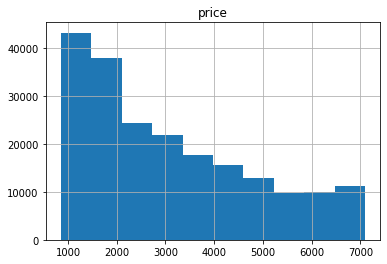

In [13]:
df.hist(column = 'price')

# 5.	Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1efe3a510>,
      dtype=object)

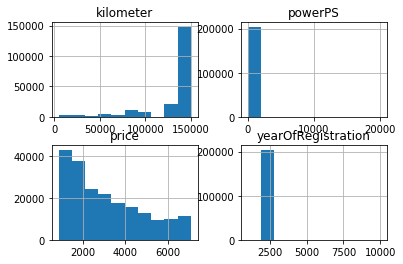

In [14]:
df.hist()

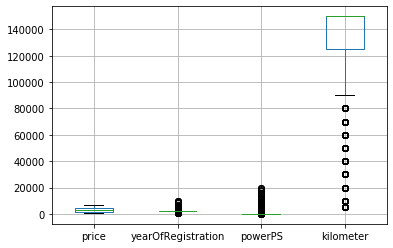

In [15]:
df.boxplot()

In [49]:
df = df[(df['kilometer'] < df['kilometer'].quantile(0.75)) & (df['kilometer'] < df['kilometer'].quantile(0.25))]
df = df[(df['powerPS'] < df['powerPS'].quantile(0.75)) & (df['powerPS'] < df['powerPS'].quantile(0.25))]
#df = df[(df['yearOfRegistration'] < df['yearOfRegistration'].quantile(0.75)) & (df['yearOfRegistration'] < df['yearOfRegistration'].quantile(0.25))]

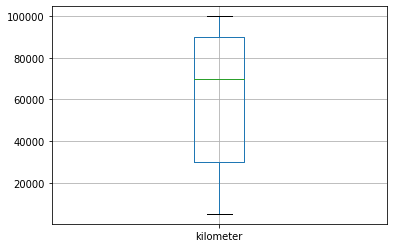

In [56]:
df.boxplot(column = 'kilometer')

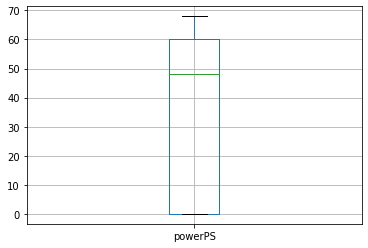

In [57]:
df.boxplot(column = 'powerPS')

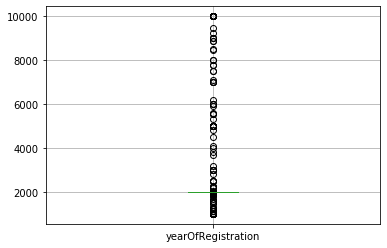

In [58]:
df.boxplot(column = 'yearOfRegistration')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1fa0b98d0>,
      dtype=object)

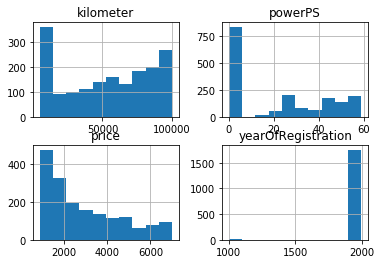

In [20]:
df.hist()

# 6.	Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

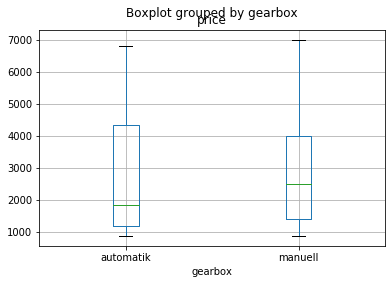

In [21]:
df.boxplot(column = 'price', by = 'gearbox')

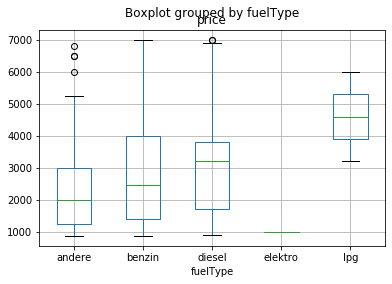

In [22]:
df.boxplot(column = 'price', by = 'fuelType')

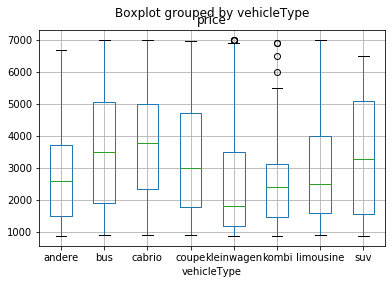

In [23]:
df.boxplot(column = 'price', by = 'vehicleType')

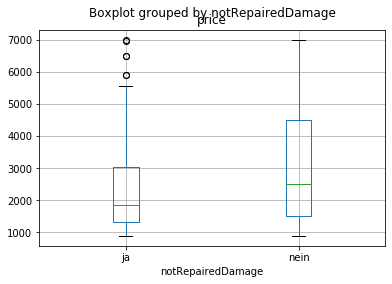

In [24]:
df.boxplot(column = 'price', by = 'notRepairedDamage')

# 7.	Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [25]:
df.isnull().sum()

seller                   0
offerType                0
price                    0
abtest                   0
vehicleType            297
yearOfRegistration       0
gearbox                433
powerPS                  0
model                  374
kilometer                0
monthOfRegistration      0
fuelType               441
brand                    0
notRepairedDamage      666
dateCreated              0
dtype: int64

In [26]:
df.fillna(df.mean(), inplace = True)
df.fillna(df.mode().iloc[0], inplace = True)

In [27]:
df.isnull().sum()

seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
dtype: int64

In [63]:
from sklearn.linear_model import LinearRegression
X = df[['yearOfRegistration', 'powerPS', 'kilometer']]
y = df['price']
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
model.score(X, y)

0.0005271630523007165

In [80]:
import numpy as np
a1, a2, a3 = input('Введите год выпуска, кол-во лошадиных сил, пробег: ').split()
data = np.array([int(a1), int(a2), int(a3)])
data = data.reshape(1, -1)
model.predict(data)

Введите год выпуска, кол-во лошадиных сил, пробег: 1985 50 1000


array([51234.31286878])

# 8.	Сохраните полученный датасет и выведете его.

In [28]:
df.to_excel('LAB3.xlsx')

In [29]:
n_df = pd.read_excel('LAB3.xlsx')
n_df

,Unnamed: 0,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated
0,28,privat,Angebot,1990,test,bus,1981,manuell,50,transporter,5000,1,benzin,volkswagen,nein,2016-03-09 00:00:00
1,496,privat,Angebot,1099,test,kleinwagen,1995,manuell,45,corsa,30000,10,benzin,opel,nein,2016-03-10 00:00:00
2,558,privat,Angebot,4900,control,cabrio,1973,manuell,44,kaefer,90000,4,benzin,volkswagen,nein,2016-03-27 00:00:00
3,632,privat,Angebot,1500,test,kleinwagen,1996,manuell,0,golf,80000,2,benzin,volkswagen,nein,2016-03-09 00:00:00
4,913,privat,Angebot,1250,control,cabrio,1995,manuell,50,swift,50000,6,benzin,suzuki,nein,2016-03-28 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,371050,privat,Angebot,900,control,kleinwagen,1995,manuell,0,601,5000,0,benzin,trabant,nein,2016-03-20 00:00:00
1759,371237,privat,Angebot,3500,test,coupe,1980,manuell,55,andere,60000,3,benzin,fiat,nein,2016-03-25 00:00:00
1760,371512,privat,Angebot,1750,test,kleinwagen,1995,manuell,0,andere,100000,12,benzin,sonstige_autos,nein,2016-03-19 00:00:00
1761,371753,privat,Angebot,5990,control,bus,1984,automatik,0,andere,70000,4,benzin,chevrolet,nein,2016-03-12 00:00:00
